Columns: Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                 

C:\Users\yadav\AppData\Local\Temp\ipykernel_24276\3561350864.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


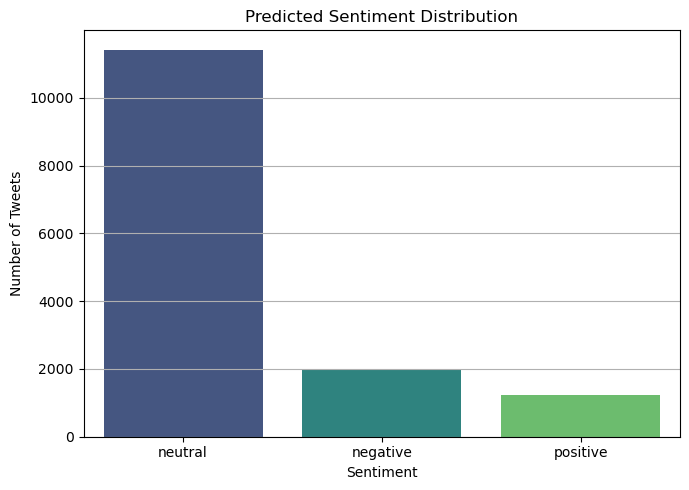

Confusion Matrix:
predicted_sentiment  negative  neutral  positive
airline_sentiment                               
negative                 1799     6969       410
neutral                   117     2827       155
positive                   62     1627       674


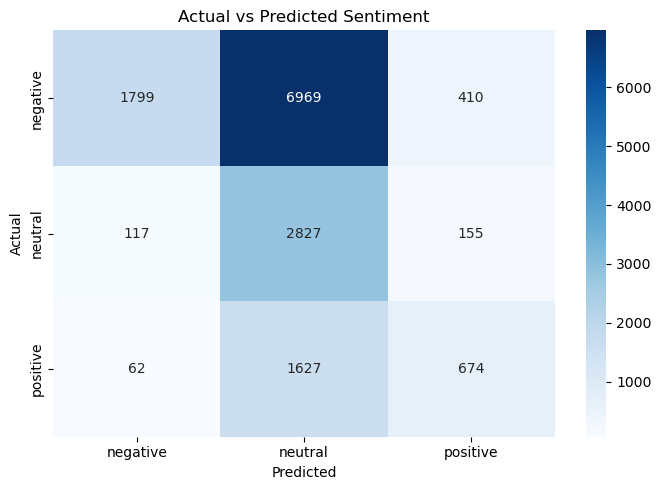

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Tweets.csv")  # or your correct path

# Preview
print("Columns:", df.columns)
print(df.head())

# Keep only necessary columns
df = df[["text", "airline_sentiment"]]
df = df.dropna()

# Predefined positive and negative words (very basic)
positive_words = ["good", "great", "happy", "love", "excellent", "awesome", "fantastic", "nice"]
negative_words = ["bad", "worst", "hate", "terrible", "poor", "angry", "awful", "delay", "late"]

# Simple function to assign sentiment score
def analyze_sentiment(text):
    text = str(text).lower()
    pos_count = sum(word in text for word in positive_words)
    neg_count = sum(word in text for word in negative_words)
    if pos_count > neg_count:
        return "positive"
    elif neg_count > pos_count:
        return "negative"
    else:
        return "neutral"

# Apply custom sentiment analysis
df["predicted_sentiment"] = df["text"].apply(analyze_sentiment)

# Compare with actual sentiment
sentiment_counts = df["predicted_sentiment"].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(7,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Predicted Sentiment Distribution")
plt.ylabel("Number of Tweets")
plt.xlabel("Sentiment")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Confusion matrix (actual vs predicted)
conf_matrix = pd.crosstab(df["airline_sentiment"], df["predicted_sentiment"])
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Actual vs Predicted Sentiment")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()
